## *IMPORT LIBRARIES*

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [ ]:
sns.set_theme(style="whitegrid") # for grid style background

In [ ]:
# Load the sales data
df = pd.read_csv("data/sales_data.csv")
df.head()

,Date,Product,Quantity,Price,Customer_ID,Region,Total_Sales
0,2024-01-01,Phone,7,37300,CUST001,East,261100
1,2024-01-02,Headphones,4,15406,CUST002,North,61624
2,2024-01-03,Phone,2,21746,CUST003,West,43492
3,2024-01-04,Headphones,1,30895,CUST004,East,30895
4,2024-01-05,Laptop,8,39835,CUST005,North,318680


In [4]:
df = df.drop_duplicates()
df.isnull().sum()

Date           0
Product        0
Quantity       0
Price          0
Customer_ID    0
Region         0
Total_Sales    0
dtype: int64

## *Visualization 1: Bar Chart — Total Sales by Product*

In [5]:
product_sales = (
    df.groupby("Product")["Total_Sales"]
    .sum()
    .sort_values(ascending=False)
    .reset_index()
)

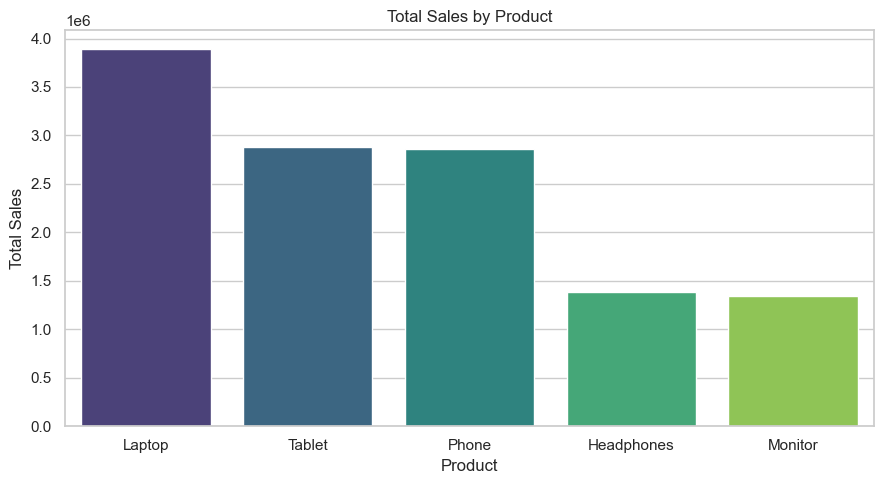

In [11]:
plt.figure(figsize=(9,5))
sns.barplot(
    data=product_sales,
    x="Product",
    y="Total_Sales",
    hue="Product",
    palette="viridis"
)
plt.title("Total Sales by Product")
plt.xlabel("Product")
plt.ylabel("Total Sales")
plt.tight_layout()

plt.savefig("visualizations/bar_chart.png")
plt.show()

## *Visualization 2: Line Chart — Sales Trend Over Time*

In [13]:
df["Date"] = pd.to_datetime(df["Date"])

daily_sales = (
    df.groupby("Date")["Total_Sales"]
    .sum()
    .reset_index()
)

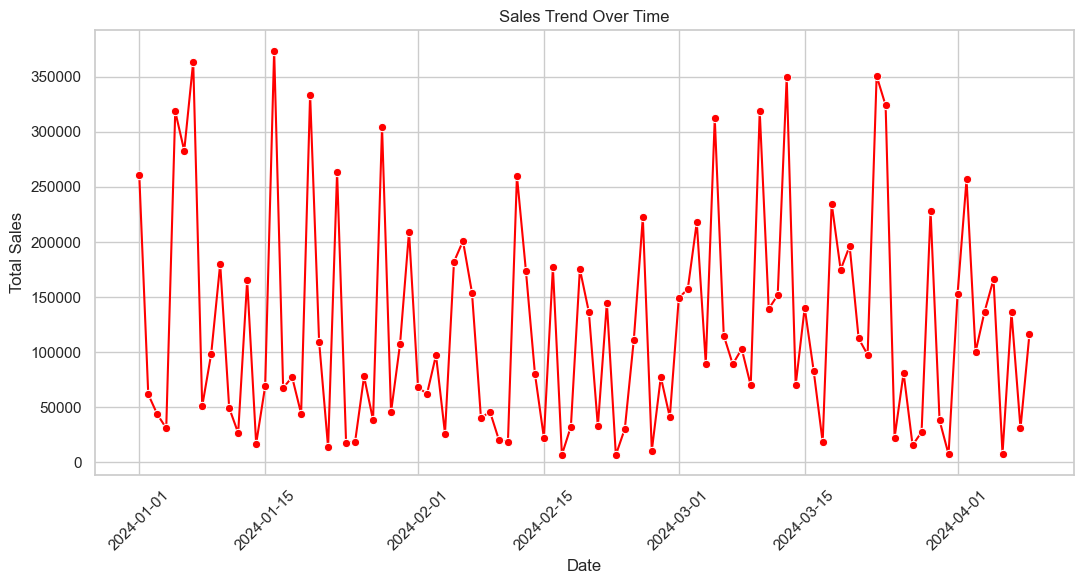

In [20]:
plt.figure(figsize=(11,6))
sns.lineplot(
    data=daily_sales,
    x="Date",
    y="Total_Sales",
    marker="o",
    color="red"
)
plt.title("Sales Trend Over Time")
plt.xlabel("Date")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.tight_layout()

plt.savefig("visualizations/line_chart.png")
plt.show()

## *Visualization 3: Pie Chart — Sales Distribution by Region*

In [21]:
region_sales = df.groupby("Region")["Total_Sales"].sum()

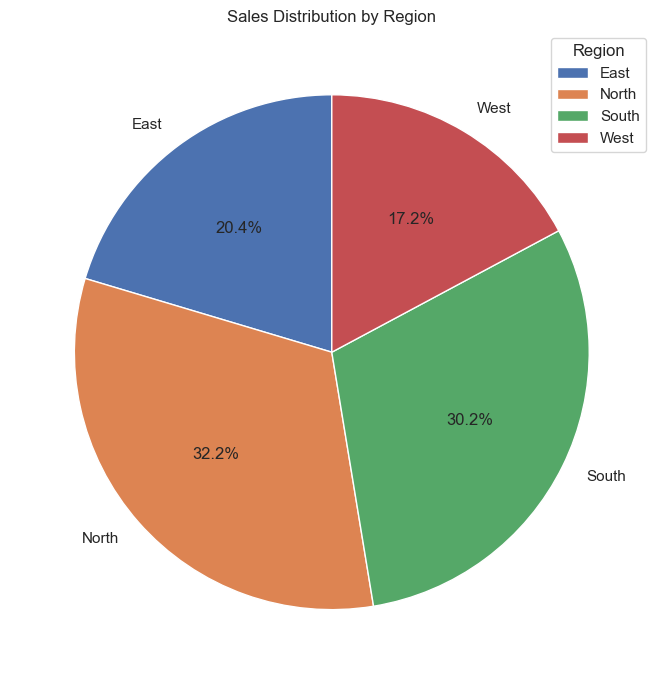

In [25]:
plt.figure(figsize=(7,7))
plt.pie(
    region_sales.values,
    labels=region_sales.index,
    autopct="%1.1f%%",
    startangle=90
)
plt.title("Sales Distribution by Region")
plt.tight_layout()
plt.legend(title="Region", loc="best")

plt.savefig("visualizations/pie_chart.png")
plt.show()

## *Heatmap — Sales by Region & Product*

In [28]:
pivot_table = pd.pivot_table(
    df,
    values="Total_Sales",
    index="Region",
    columns="Product",
    aggfunc="sum"
)

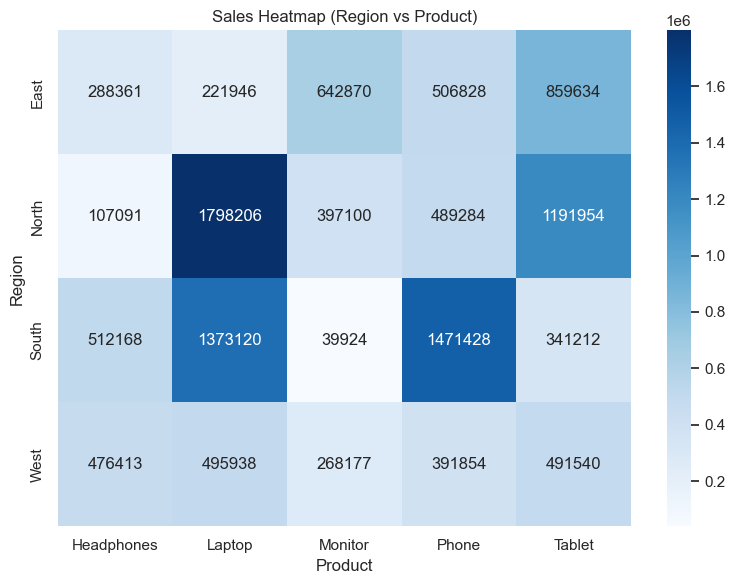

In [30]:
plt.figure(figsize=(8,6))
sns.heatmap(pivot_table, annot=True, fmt=".0f", cmap="Blues")
plt.title("Sales Heatmap (Region vs Product)")
plt.tight_layout()
plt.savefig("visualizations/heatmap.png")
plt.show()

## *Key Metrics*

In [27]:
total_revenue = df["Total_Sales"].sum()
average_sale = df["Total_Sales"].mean()
best_product = product_sales.loc[0, "Product"]

print(f"Total Revenue: ${total_revenue:,.2f}")
print(f"Average Sale Amount: ${average_sale:,.2f}") 
print(f"Best Selling Product: {best_product}")

Total Revenue: $12,365,048.00
Average Sale Amount: $123,650.48
Best Selling Product: Laptop
